<a href="https://colab.research.google.com/github/bishalkumardas/Image-processing/blob/main/Copy_of_Cats_%26_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unrar x -Y "/content/drive/My Drive/Petimages.rar"

Streaming output truncated to the last 5000 lines.
Extracting  Petimages/training_set/cats/cat.3701.jpg                      47%  OK 
Extracting  Petimages/training_set/cats/cat.3702.jpg                      47%  OK 
Extracting  Petimages/training_set/cats/cat.3703.jpg                      47%  OK 
Extracting  Petimages/training_set/cats/cat.3704.jpg                      47%  OK 
Extracting  Petimages/training_set/cats/cat.3705.jpg                      47%  OK 
Extracting  Petimages/training_set/cats/cat.3706.jpg                      47%  OK 
Extracting  Petimages/training_set/cats/cat.3707.jpg                      47%  OK 
Extracting  Petimages/training_set/cats/cat.3708.jpg                      47%  OK 
Extracting  Petimages/training_set/cats/cat.3709.jpg                      47%  OK 
Extracting  Petimages/training_set/cats/cat.371.jpg                       47%  OK 
Extracting  Petimages/trainin

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [5]:
#Providing Path to images for visualization
Cats_images="Petimages/training_set/cats/"
dogs_images="Petimages/training_set/dogs/"

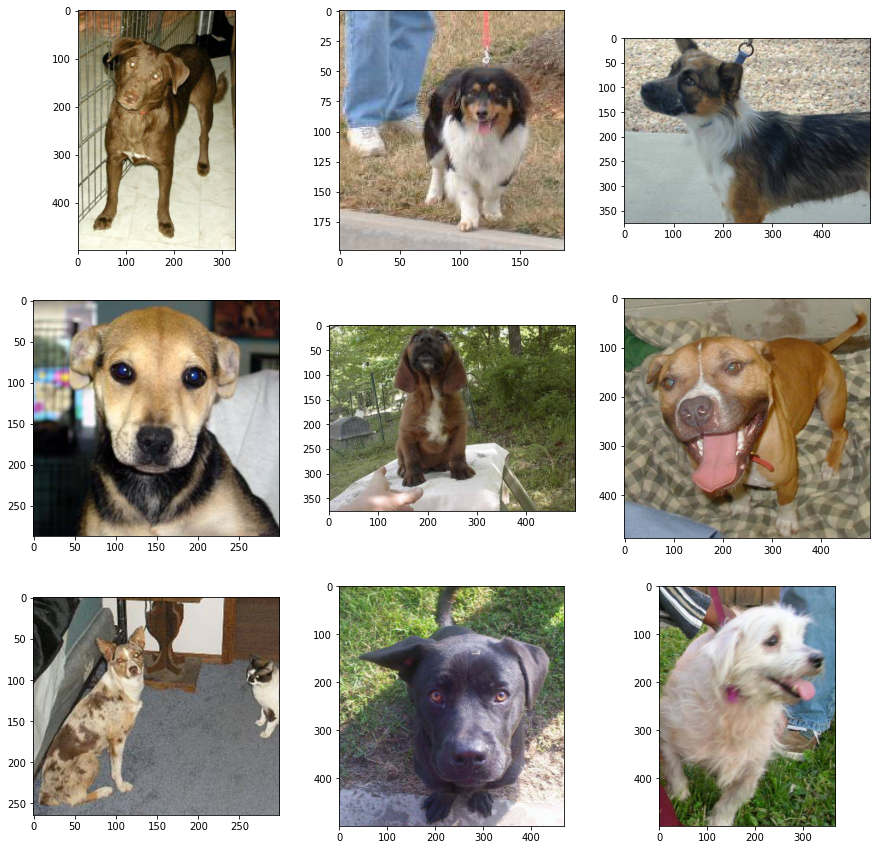

In [6]:
#Visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(330 + 1 + i)
    filename=dogs_images + "dog." + str(i+1) + ".jpg"
    image = plt.imread(filename)
    plt.imshow(image)
    
# show the figure
plt.show()

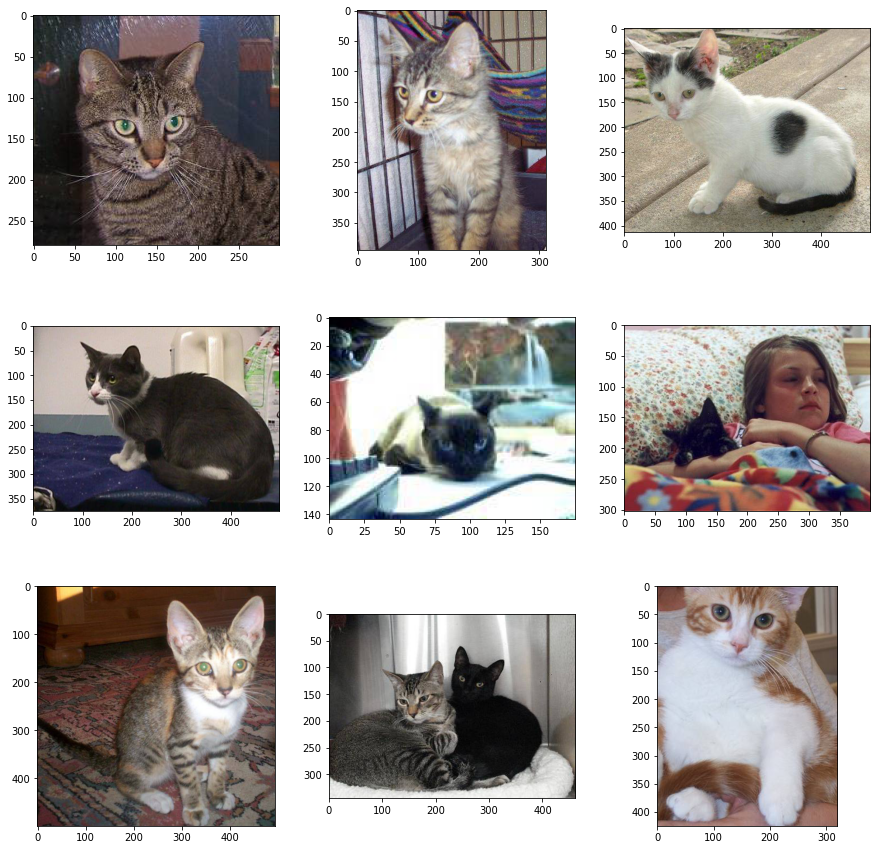

In [7]:
#Visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(330 + 1 + i)
    filename=Cats_images + "cat." + str(i+1) + ".jpg"
    image = plt.imread(filename)
    plt.imshow(image)
    
# show the figure
plt.show()

In [8]:
classifier=Sequential()

#Step_1 Convolution
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

#Step_2 Convolution
classifier.add(Conv2D(16,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

#Step_3 Convolution
classifier.add(Conv2D(16,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

#Step_4 Convolution
classifier.add(Conv2D(8,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

#Flatten
classifier.add(Flatten())

#Dense layer
classifier.add(Dense(128,activation='relu'))
classifier.add(Dense(64,activation='relu'))
classifier.add(Dense(64,activation='relu'))
classifier.add(Dense(2,activation='softmax'))


classifier.compile(optimizer=tf.keras.optimizers.SGD(
                    learning_rate=0.01,
                    momentum=0.0),loss='categorical_crossentropy',
                   metrics=['accuracy'])

classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 16)         0

In [9]:
#Image augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                zoom_range=0.2,
                                shear_range=0.2,
                                horizontal_flip=True)


test_datagen=ImageDataGenerator(rescale=1./255)

training_set=train_datagen.flow_from_directory("Petimages/training_set/",
                                              target_size=(64,64),
                                              batch_size=16,
                                              class_mode='categorical')

test_set=train_datagen.flow_from_directory("Petimages/test_set/",
                                              target_size=(64,64),
                                              batch_size=16,
                                              class_mode='categorical')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [10]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)

history = classifier.fit(training_set,validation_data=test_set,epochs=50,batch_size=64,callbacks=[callback])


Epoch 1/50
500/500 [==============================] - 47s 72ms/step - loss: 0.6923 - accuracy: 0.5230 - val_loss: 0.6918 - val_accuracy: 0.5165
Epoch 2/50
500/500 [==============================] - 35s 70ms/step - loss: 0.6906 - accuracy: 0.5374 - val_loss: 0.6882 - val_accuracy: 0.5780
Epoch 3/50
500/500 [==============================] - 36s 72ms/step - loss: 0.6878 - accuracy: 0.5604 - val_loss: 0.6844 - val_accuracy: 0.5470
Epoch 4/50
500/500 [==============================] - 36s 72ms/step - loss: 0.6849 - accuracy: 0.5627 - val_loss: 0.6783 - val_accuracy: 0.6065
Epoch 5/50
500/500 [==============================] - 37s 73ms/step - loss: 0.6796 - accuracy: 0.5700 - val_loss: 0.6702 - val_accuracy: 0.5970
Epoch 6/50
500/500 [==============================] - 36s 72ms/step - loss: 0.6731 - accuracy: 0.5839 - val_loss: 0.6615 - val_accuracy: 0.6300
Epoch 7/50
500/500 [==============================] - 37s 73ms/step - loss: 0.6666 - accuracy: 0.5982 - val_loss: 0.6607 - val_accuracy:

In [20]:
classifier.save('My_module.h5')

In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense

In [13]:
#transfer learning

from tensorflow.keras.applications import VGG16
VGG=VGG16(input_shape=(64,64,3),weights="imagenet",include_top=False)

for layer in VGG.layers:
    layer.trainable=False

58900480/58889256 [==============================] - 0s 0us/step


In [14]:
x = Flatten()(VGG.output)
x = Dense(128,activation='relu')(x)
x = Dense(64,activation='relu')(x)
x = Dense(2,activation='softmax')(x)

model=Model(inputs=VGG.input,outputs=x)
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [18]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
model.fit(training_set,validation_data=test_set,epochs=50,batch_size=64,callbacks=[callback])

Epoch 1/50
500/500 [==============================] - 38s 76ms/step - loss: 0.5468 - accuracy: 0.7205 - val_loss: 0.5468 - val_accuracy: 0.7230
Epoch 2/50
500/500 [==============================] - 38s 75ms/step - loss: 0.4974 - accuracy: 0.7615 - val_loss: 0.4775 - val_accuracy: 0.7650
Epoch 3/50
500/500 [==============================] - 37s 74ms/step - loss: 0.4790 - accuracy: 0.7670 - val_loss: 0.4602 - val_accuracy: 0.7800
Epoch 4/50
500/500 [==============================] - 38s 75ms/step - loss: 0.4780 - accuracy: 0.7710 - val_loss: 0.4559 - val_accuracy: 0.7800
Epoch 5/50
500/500 [==============================] - 38s 76ms/step - loss: 0.4660 - accuracy: 0.7755 - val_loss: 0.5507 - val_accuracy: 0.7160
